## Credit Card Fraud Detection using Machine Learning and Deep Learning in Python.

Credit card fraud has become a major concern in the financial sector, with cybercriminals continuously finding new ways to exploit vulnerabilities. As digital transactions increase, so does the risk of fraudulent activities, making it crucial for businesses and financial institutions to implement robust fraud detection systems.

In this project I have utilised machine learning tecniques such as XGBoost Classifier, Random Forest, Autoencoders, LSTMs, and Isolation Forest to detect anomalies, patterns and suspicious activities.

Effective fraud detection systems protect consumers from unauthorized charges, enhance transaction security, and improve the overall trust in digital payment systems. Financial institutions leverage fraud detection models to provide secure banking services while minimizing inconvenience to legitimate users.

Overview of data:

This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

Key Features:

1. id: Unique identifier for each transaction
2. 
V1-V28: Anonymized features representing various transaction attribute (e.g., time, location, etc.)
3. Amount: The transaction amount.
4. Class: Binary label indicating whether the transactions is fraudelent (1) or not(0).(0)

### Importing necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors

# Deep Learning (LSTM & Autoencoders)
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Performance Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

#### Exploratory Data Analysis(EDA)

In [3]:
credit_data = pd.read_csv("creditcard_2023.csv")
credit_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
credit_data.dropna(axis = 0, inplace = True)

In [6]:
credit_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit_data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
credit_data.Class.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12064\3209706776.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(credit_data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

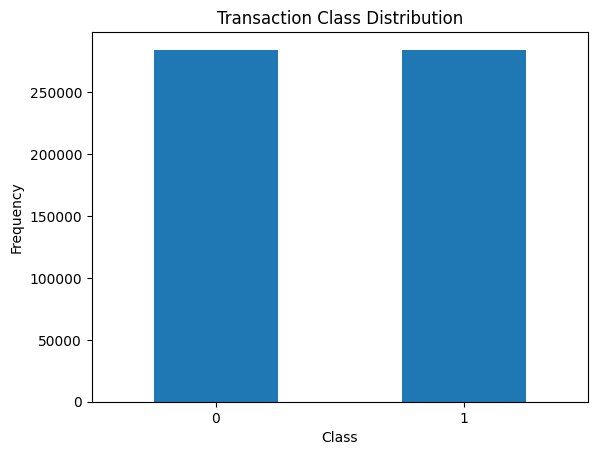

In [9]:
count_classes = pd.value_counts(credit_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

**Since the dataset contains an equal number of fraudulent and legitimate transactions, it is considered balanced, which is rare in fraud detection. However, because the dataset is already balanced, there is no need to apply any techniques to address class imbalance.**

In [10]:
# Get the fraud and the normal dataset 

fraud = credit_data[credit_data['Class']==1]

normal = credit_data[credit_data['Class']==0]

In [11]:
fraud1 = fraud.sample(frac = 0.4, random_state = 40, axis = 0)
normal1 = normal.sample(frac = 0.4, random_state = 40, axis = 0)

**Here we are dividing and exploring the fraction of data because the dataset is extensively large and for running such large amount of data causes long traning of models which is a memory consuming process hence we have taken the fraction of dataset for traing and testing the model.**

In [12]:
print(fraud1.shape,normal1.shape)

(113726, 31) (113726, 31)


In [13]:
fraud1.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
485998,485998,-1.440547,1.467896,-1.465868,0.752111,-1.459378,-1.735815,-1.131329,1.726844,-0.621852,...,0.254668,-0.789536,-0.068650,-0.044527,0.887187,-0.611935,1.304677,0.431415,19950.50,1
296303,296303,-0.935238,0.608371,-0.653562,0.721731,-0.171170,0.621385,-0.353268,-0.771348,0.138942,...,1.239751,-0.779326,0.821111,-0.114692,0.004628,1.306614,-0.587036,2.797985,3777.99,1
463110,463110,-0.786393,0.327822,-0.504587,-0.070184,-0.446852,-0.534053,-0.500935,0.158242,1.080979,...,0.349392,-0.047935,0.428324,-0.260576,0.119642,0.246203,-0.976184,0.705627,12135.18,1
511180,511180,-0.377394,0.026415,-0.229060,0.176872,0.294450,-0.733094,0.143042,-0.230786,0.270947,...,-0.105535,-0.489242,0.158080,0.237449,-0.297709,-2.405227,-0.743353,1.469716,23460.18,1
366099,366099,-0.488352,0.592816,-0.349683,0.620239,-0.227611,1.004206,-0.765357,-1.436145,-0.654079,...,-1.563679,1.052626,0.525622,-0.254470,-0.838755,0.941298,-0.097039,0.386591,23370.28,1


In [14]:
normal1.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202070,202070,-0.138762,-1.191915,0.180890,-1.285035,0.223984,0.455407,0.259450,0.000165,0.128090,...,0.023688,-0.033250,1.102369,0.163287,-3.535552,-2.327565,0.025944,0.193237,14454.25,0
12040,12040,0.590662,-0.696892,1.172548,-0.025900,0.003379,1.067037,0.211901,-0.054037,1.912730,...,-0.029895,0.433419,-0.208075,-0.575413,0.242354,-0.601982,-0.206585,0.005443,18525.84,0
179159,179159,1.851804,-0.451239,0.021300,-0.514300,0.357340,-0.005677,0.510550,-0.225629,0.809763,...,-0.236610,-0.716679,0.229698,-1.069327,-0.377510,0.533627,-0.313409,-0.258478,4839.64,0
227282,227282,-0.346450,0.051996,2.706397,0.851223,-0.145106,1.689003,-0.019330,0.247121,0.113573,...,-0.046193,0.787827,-0.232456,-0.470127,0.444793,1.402960,-0.007203,0.072307,11166.21,0
81983,81983,-0.107485,-0.320214,0.764163,-1.410715,0.012325,0.234831,1.226693,-0.266585,-0.329630,...,-0.391295,-1.316650,-0.005648,-0.252129,-0.525842,-0.042487,-0.306831,0.033904,13567.55,0


In [15]:
credit_data.shape

(568630, 31)

In [16]:
fraud1.Amount.describe()

count    113726.000000
mean      12026.938711
std        6901.676373
min          50.280000
25%        6053.322500
50%       12010.935000
75%       17998.440000
max       24039.760000
Name: Amount, dtype: float64

In [17]:
normal1.Amount.describe()

count    113726.000000
mean      12041.111595
std        6922.482576
min          50.280000
25%        6072.712500
50%       12025.390000
75%       18044.715000
max       24039.930000
Name: Amount, dtype: float64

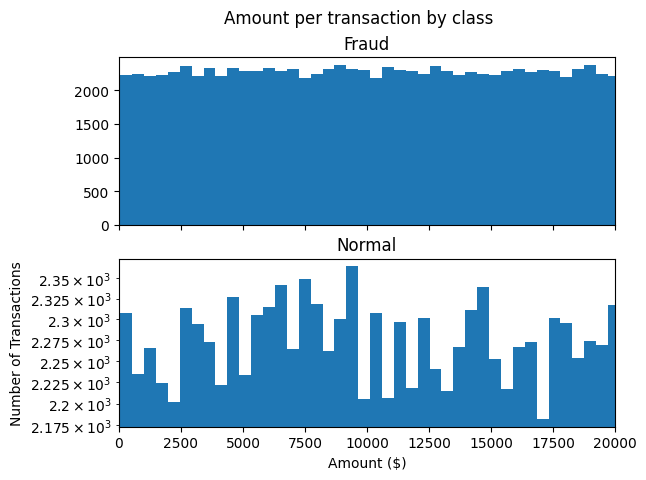

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud1.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal1.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

**In case of normal transaction the data is showing very little flactuations as compared to the fraudelent transactions.**

In [19]:
new_data = pd.concat([normal1, fraud1], axis = 0)

In [20]:
new_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202070,202070,-0.138762,-1.191915,0.180890,-1.285035,0.223984,0.455407,0.259450,0.000165,0.128090,...,0.023688,-0.033250,1.102369,0.163287,-3.535552,-2.327565,0.025944,0.193237,14454.25,0
12040,12040,0.590662,-0.696892,1.172548,-0.025900,0.003379,1.067037,0.211901,-0.054037,1.912730,...,-0.029895,0.433419,-0.208075,-0.575413,0.242354,-0.601982,-0.206585,0.005443,18525.84,0
179159,179159,1.851804,-0.451239,0.021300,-0.514300,0.357340,-0.005677,0.510550,-0.225629,0.809763,...,-0.236610,-0.716679,0.229698,-1.069327,-0.377510,0.533627,-0.313409,-0.258478,4839.64,0
227282,227282,-0.346450,0.051996,2.706397,0.851223,-0.145106,1.689003,-0.019330,0.247121,0.113573,...,-0.046193,0.787827,-0.232456,-0.470127,0.444793,1.402960,-0.007203,0.072307,11166.21,0
81983,81983,-0.107485,-0.320214,0.764163,-1.410715,0.012325,0.234831,1.226693,-0.266585,-0.329630,...,-0.391295,-1.316650,-0.005648,-0.252129,-0.525842,-0.042487,-0.306831,0.033904,13567.55,0


In [21]:
new_data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
416503,416503,-0.690490,-0.103720,-0.209952,0.595922,-0.624151,0.994990,-0.062639,0.061658,-0.667021,...,0.146492,0.997497,0.845919,-0.670229,-0.138417,0.044559,0.932699,-1.080917,11507.24,1
550779,550779,0.933135,-0.051027,0.002390,0.132997,0.666114,-0.076697,0.562709,-0.163660,0.456794,...,-0.247939,-0.655367,-0.162658,-0.467185,1.055595,-0.760449,-0.116541,0.196345,18712.21,1
410876,410876,-0.957048,1.071777,-1.090765,1.458644,-0.874367,-0.510473,-0.909796,0.787189,-1.334863,...,0.336016,-0.173810,0.236771,-0.723203,-0.374777,0.416573,-0.373170,-1.272228,17452.20,1
456759,456759,-0.886171,0.426957,-0.663130,0.900452,-0.581898,-0.060001,-0.536350,0.043851,-0.538338,...,0.439134,0.157500,0.297453,1.550483,-0.653627,-0.678231,-1.235779,2.408184,2403.72,1
535972,535972,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,...,8.087080,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,23726.19,1


In [22]:
new_data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142473.31743,0.503964,-0.491401,0.681837,-0.739016,0.338783,0.433336,0.491569,-0.144661,0.588873,...,-0.180660,-0.110362,-0.014824,-0.011643,0.130607,-0.060308,-0.075211,-0.213820,-0.101330,12041.111595
1,426199.16742,-0.504356,0.490200,-0.681306,0.735819,-0.336615,-0.432574,-0.490225,0.144078,-0.585988,...,0.178603,0.110560,0.013807,0.004586,-0.132815,0.061823,0.071306,0.220142,0.103369,12026.938711


In [23]:
credit_data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


#### Splitting the dataset

In [24]:
X = new_data.drop(columns = ['Class', 'id'], axis = 1)
Y = new_data['Class']

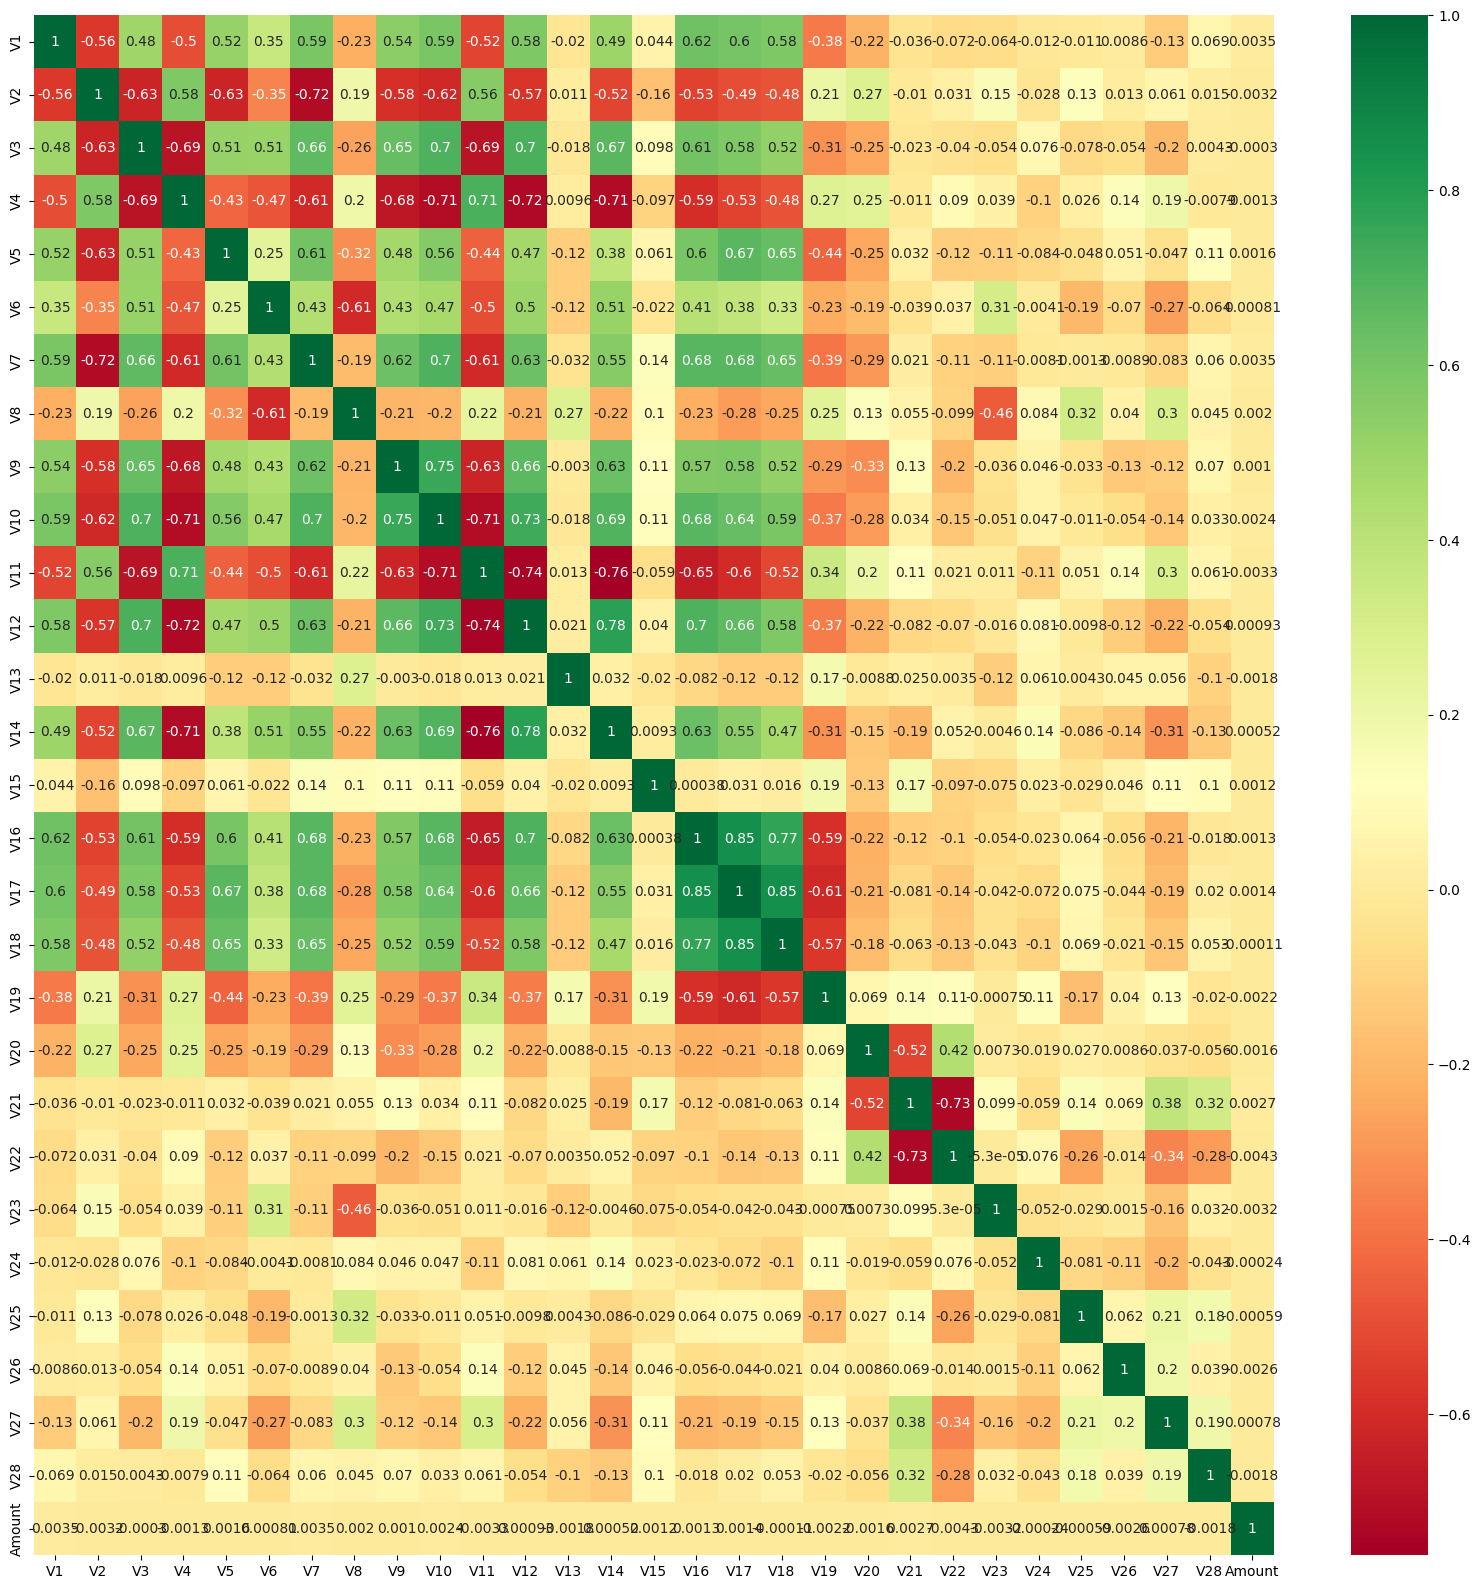

In [25]:
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(new_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Correlation matrix shows that vector 16 and 17 are highly correlated and greater than 0.8 hence we are going to drop those columns.**

In [26]:
X.drop(columns = [ 'V16','V17'], axis=0, inplace = True)

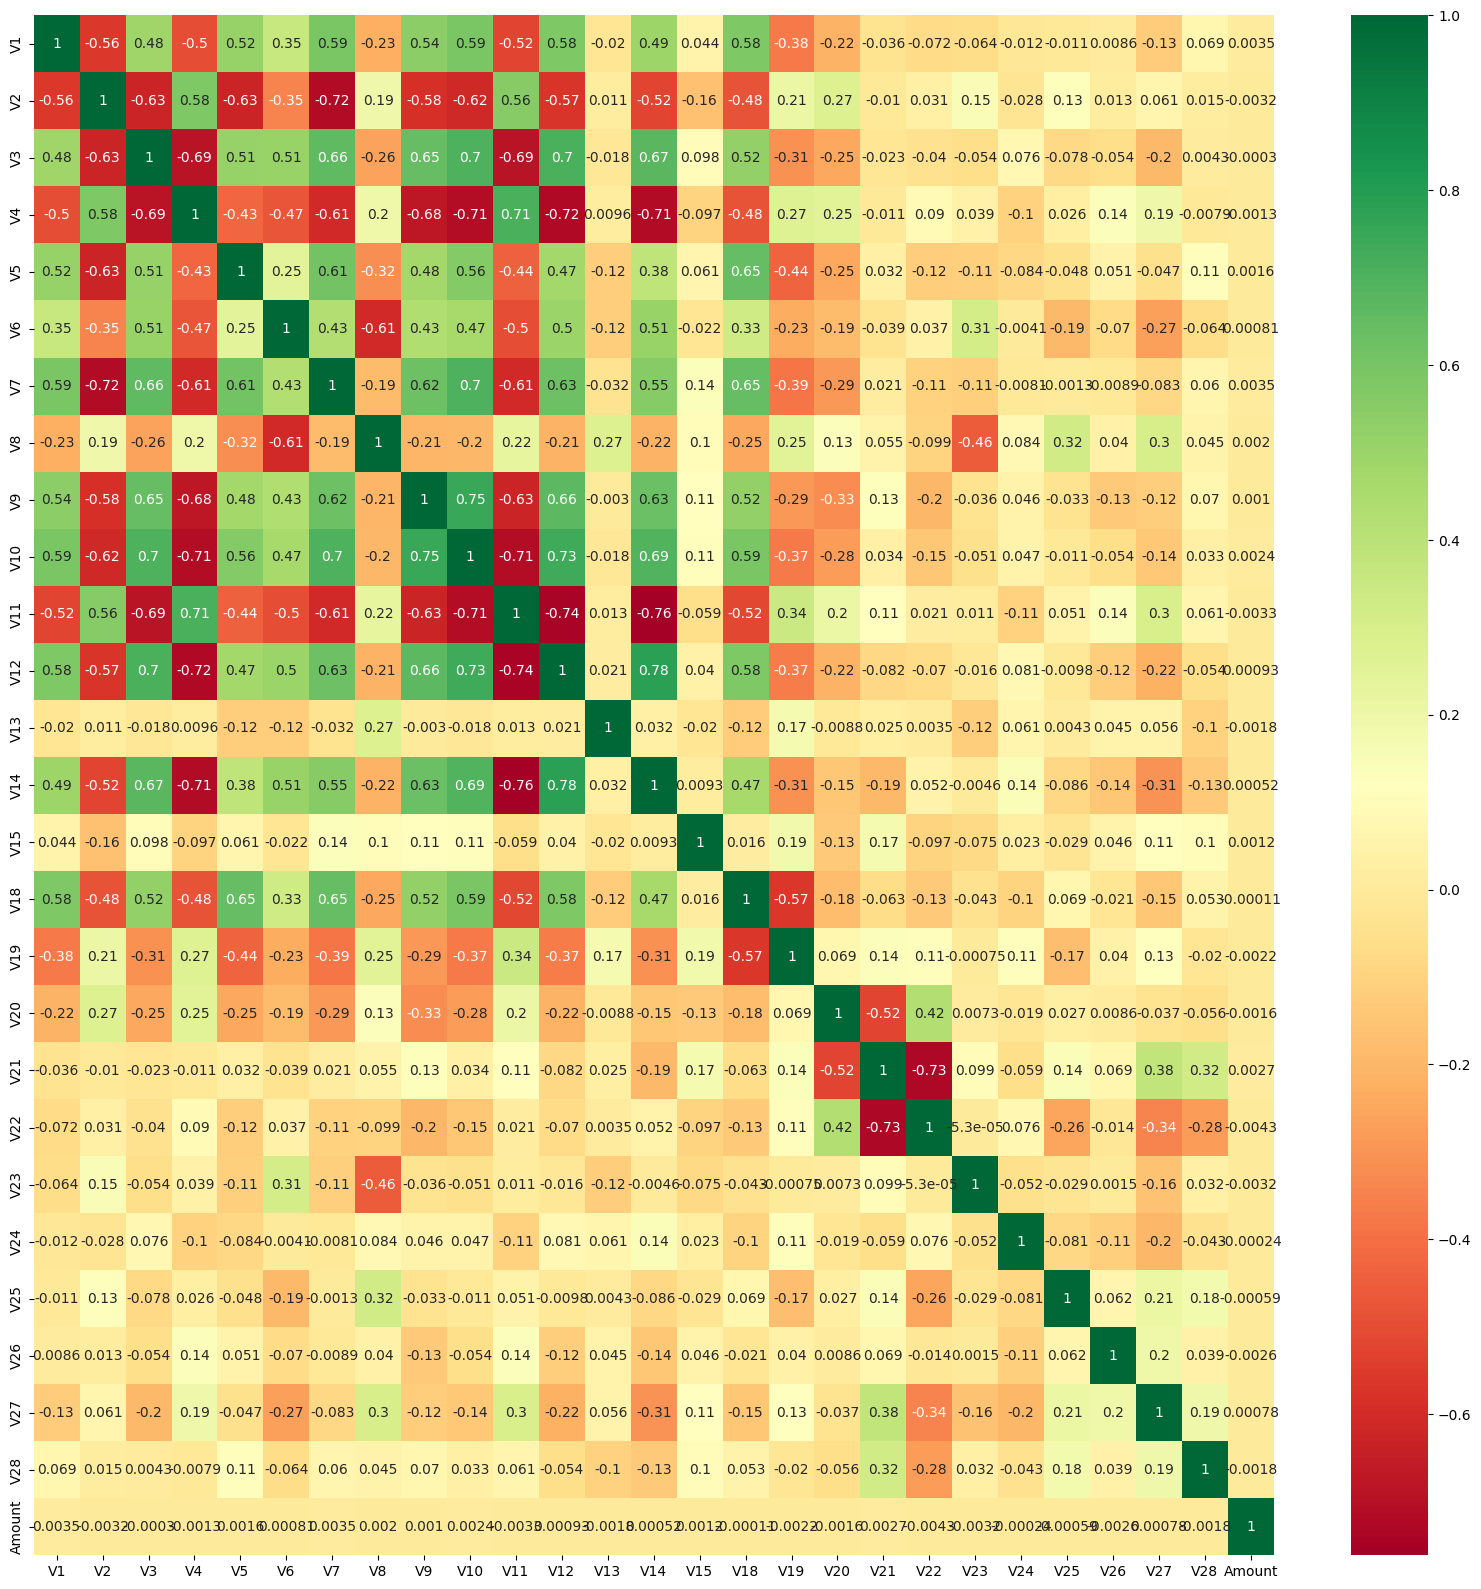

In [27]:
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(new_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
202070,-0.138762,-1.191915,0.180890,-1.285035,0.223984,0.455407,0.259450,0.000165,0.128090,0.655982,...,0.513369,0.023688,-0.033250,1.102369,0.163287,-3.535552,-2.327565,0.025944,0.193237,14454.25
12040,0.590662,-0.696892,1.172548,-0.025900,0.003379,1.067037,0.211901,-0.054037,1.912730,0.431191,...,-0.070351,-0.029895,0.433419,-0.208075,-0.575413,0.242354,-0.601982,-0.206585,0.005443,18525.84
179159,1.851804,-0.451239,0.021300,-0.514300,0.357340,-0.005677,0.510550,-0.225629,0.809763,0.621573,...,-0.325568,-0.236610,-0.716679,0.229698,-1.069327,-0.377510,0.533627,-0.313409,-0.258478,4839.64
227282,-0.346450,0.051996,2.706397,0.851223,-0.145106,1.689003,-0.019330,0.247121,0.113573,1.214382,...,0.083514,-0.046193,0.787827,-0.232456,-0.470127,0.444793,1.402960,-0.007203,0.072307,11166.21
81983,-0.107485,-0.320214,0.764163,-1.410715,0.012325,0.234831,1.226693,-0.266585,-0.329630,0.651819,...,-0.912566,-0.391295,-1.316650,-0.005648,-0.252129,-0.525842,-0.042487,-0.306831,0.033904,13567.55


In [29]:
Y

202070    0
12040     0
179159    0
227282    0
81983     0
         ..
416503    1
550779    1
410876    1
456759    1
535972    1
Name: Class, Length: 227452, dtype: int64

In [30]:
# Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
y_test.head()

271907    0
210823    0
196242    0
555224    1
294154    1
Name: Class, dtype: int64

In [32]:
# Standardization (Important for Autoencoders, LSTMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for test data

#### Training the different models and evaluating their accuracy scores

In [34]:
# Random Forest
rf = RandomForestClassifier(n_estimators=80, max_depth = 10, min_samples_split = 5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [35]:
print("Classification Report:") 
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     22656
           1       1.00      0.97      0.99     22835

    accuracy                           0.99     45491
   macro avg       0.99      0.99      0.99     45491
weighted avg       0.99      0.99      0.99     45491



In [36]:
roc = roc_auc_score(y_test, y_pred_rf)
print(f"ROC-AUC Score: {roc:.4f}")

ROC-AUC Score: 0.9854


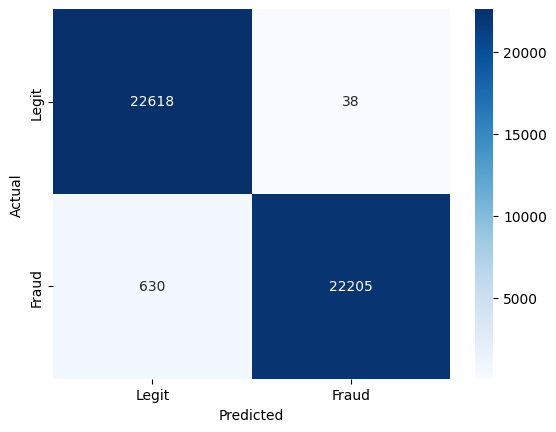

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
print(f"Train Accuracy: {rf.score(X_train_scaled, y_train)}")
print(f"Test Accuracy: {rf.score(X_test_scaled, y_test)}")

C:\Users\LENOVO\miniconda3\envs\pythonDS\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Train Accuracy: 0.9873929028747919


C:\Users\LENOVO\miniconda3\envs\pythonDS\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 0.9850300059352399


In [39]:
print(pd.Series(y_pred_rf).value_counts())  # Check if model predicts mostly 0s

0    23248
1    22243
Name: count, dtype: int64


In [40]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).head(10))

V14    0.230309
V10    0.206163
V4     0.120853
V12    0.119273
V3     0.083842
V11    0.049199
V7     0.034555
V2     0.021030
V9     0.019068
V21    0.017999
dtype: float64


In [41]:
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

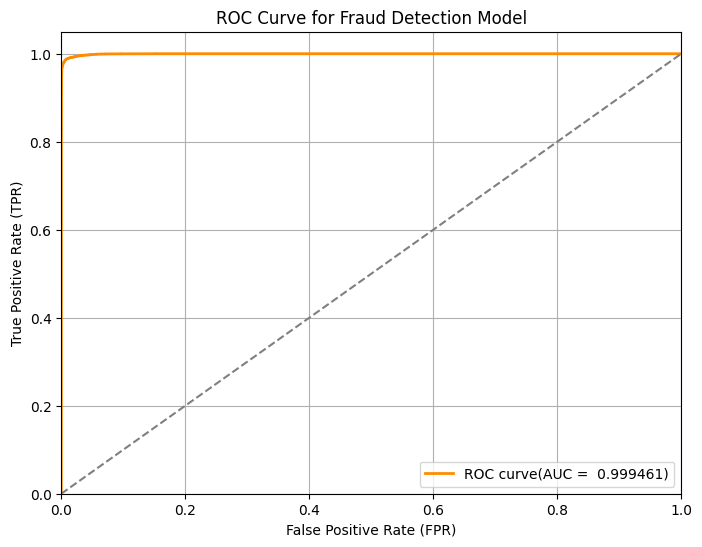

In [42]:
# Plot the ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve(AUC = {roc_auc: 2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Fraud Detection Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [43]:
# XGBoost Classifier
xgb = XGBClassifier( n_estimators=150,learning_rate=0.05, 
                    max_depth=5, reg_alpha=0.01, reg_lambda=1,
                    use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22656
           1       0.99      0.99      0.99     22835

    accuracy                           0.99     45491
   macro avg       0.99      0.99      0.99     45491
weighted avg       0.99      0.99      0.99     45491

ROC-AUC Score: 0.9889


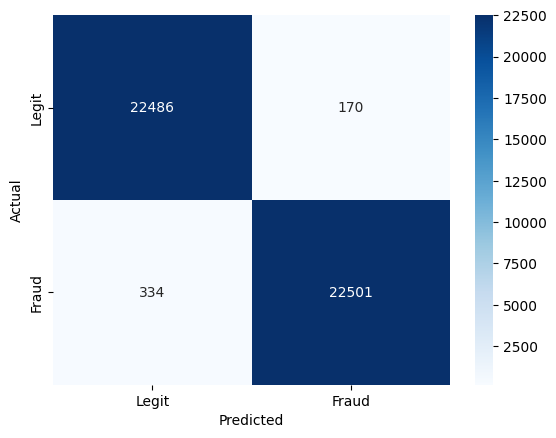

In [44]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
roc = roc_auc_score(y_test, y_pred_xgb)
print(f"ROC-AUC Score: {roc:.4f}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
print(pd.Series(y_pred_xgb).value_counts())  # Check if model predicts mostly 0s
feature_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).head(10))

0    22820
1    22671
Name: count, dtype: int64
V14    0.583975
V4     0.059447
V12    0.032746
V10    0.025712
V8     0.024340
V3     0.020867
V1     0.020445
V28    0.018174
V25    0.017194
V13    0.016659
dtype: float32


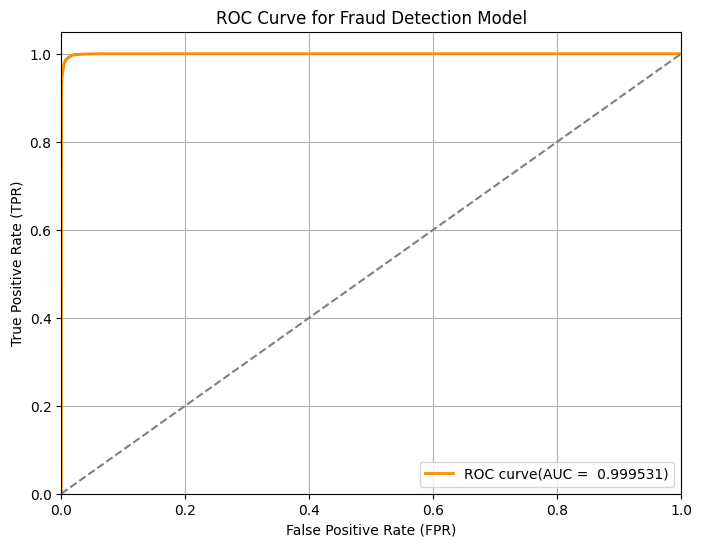

In [46]:
y_pred_prob = xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve(AUC = {roc_auc: 2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Fraud Detection Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [47]:
# Isolation Forest
iso_forest = IsolationForest(n_estimators=150, max_samples='auto',max_features=0.8,
                             contamination=0.01, random_state=42)
iso_forest.fit(X_train_scaled)

y_pred_iso = iso_forest.predict(X_test_scaled)
y_pred_iso = [1 if pred == -1 else 0 for pred in y_pred_iso]  # Convert -1 (outlier) to fraud

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     22656
           1       0.96      0.02      0.04     22835

    accuracy                           0.51     45491
   macro avg       0.73      0.51      0.35     45491
weighted avg       0.73      0.51      0.35     45491

ROC-AUC Score: 0.5090


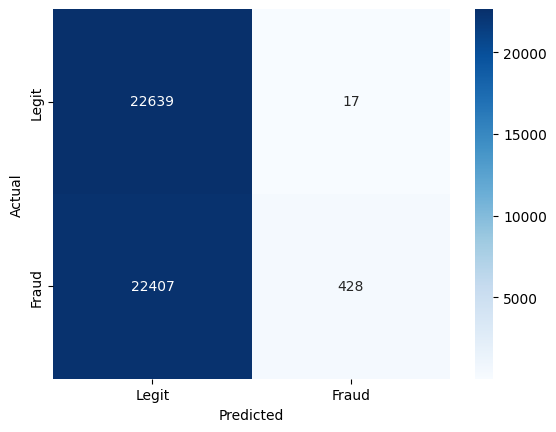

In [48]:
print("Classification Report:")
print(classification_report(y_test, y_pred_iso))
roc = roc_auc_score(y_test, y_pred_iso)
print(f"ROC-AUC Score: {roc:.4f}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_iso)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [49]:
print(pd.Series(y_pred_iso).value_counts())  # Check if model predicts mostly 0s


0    45046
1      445
Name: count, dtype: int64


#### Splitting the dataset to train deep learning models

#### Training the deep learning models

In [50]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [51]:
# LSTM
model = Sequential([
    LSTM(8, input_shape=(1, X_train_scaled.shape[1]), return_sequences=True),
    Dropout(0.3),
    LSTM(8, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_reshaped, y_train, epochs=8, batch_size=32, validation_data=(X_test_reshaped, y_test))

y_pred_lstm = (model.predict(X_test_reshaped) > 0.5).astype(int)


C:\Users\LENOVO\miniconda3\envs\pythonDS\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9153 - loss: 0.2288 - val_accuracy: 0.9758 - val_loss: 0.0614
Epoch 2/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9738 - loss: 0.0707 - val_accuracy: 0.9827 - val_loss: 0.0455
Epoch 3/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9780 - loss: 0.0583 - val_accuracy: 0.9862 - val_loss: 0.0361
Epoch 4/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9799 - loss: 0.0522 - val_accuracy: 0.9870 - val_loss: 0.0339
Epoch 5/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9818 - loss: 0.0481 - val_accuracy: 0.9896 - val_loss: 0.0288
Epoch 6/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9828 - loss: 0.0454 - val_accuracy: 0.9888 - val_loss: 0.0270
Epoch 7/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9838 - loss: 0.0436 - val_accuracy: 0.9906 - val_loss: 0.0258
Epoch 8/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9848 - loss: 0.0422 - 

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     22656
           1       0.99      0.99      0.99     22835

    accuracy                           0.99     45491
   macro avg       0.99      0.99      0.99     45491
weighted avg       0.99      0.99      0.99     45491

ROC-AUC Score: 0.9926


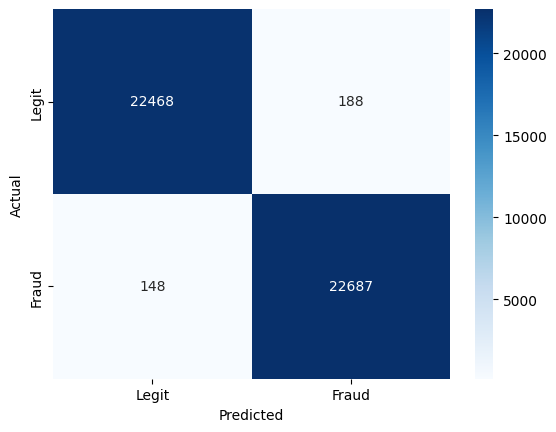

In [52]:
print("Classification Report:\n",  classification_report(y_test, y_pred_lstm))
roc = roc_auc_score(y_test, y_pred_lstm)
print(f"ROC-AUC Score: {roc:.4f}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

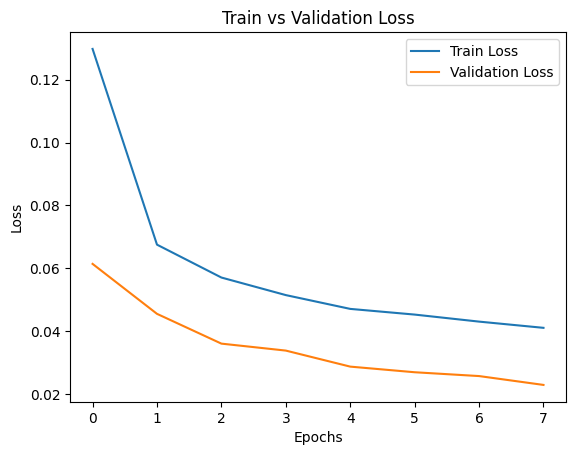

In [53]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

In [54]:
# Autoencoders
# Define input dimension
input_dim = X_train_scaled.shape[1]

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)

# Decoder
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=15, batch_size=64, validation_data=(X_test_scaled, X_test_scaled))

# Reconstruction error for fraud detection
X_test_reconstructed = autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - X_test_reconstructed, 2), axis=1)
threshold = np.percentile(mse, 95)  # Set a threshold for anomaly detection

y_pred_autoencoder = (mse > threshold).astype(int)

Epoch 1/15
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.8349 - val_loss: 0.7607
Epoch 2/15
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7351 - val_loss: 0.7374
Epoch 3/15
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7165 - val_loss: 0.7258
Epoch 4/15
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7078 - val_loss: 0.7216
Epoch 5/15
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7060 - val_loss: 0.7191
Epoch 6/15
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7041 - val_loss: 0.7155
Epoch 7/15
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6930 - val_loss: 0.7142
Epoch 8/15
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6945 - val_loss: 0.7140
Epoch 9/15
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6915 - val_loss: 0.7100
Epoch 10/15
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6900 - val_loss: 0.7071
Epoch 11/15
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6900 - val_loss: 0.6945
Epoch 12/15
2844/2844 ━━━━━━━

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.99      0.68     22656
           1       0.87      0.09      0.16     22835

    accuracy                           0.53     45491
   macro avg       0.69      0.54      0.42     45491
weighted avg       0.69      0.53      0.42     45491

ROC-AUC Score: 0.5367


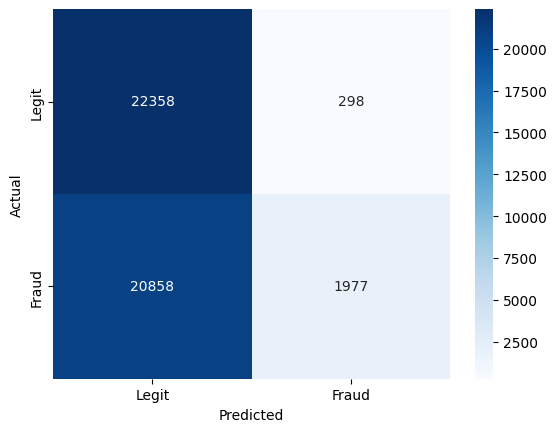

In [58]:
print("Classification Report:\n", classification_report(y_test, y_pred_autoencoder))
roc = roc_auc_score(y_test, y_pred_autoencoder)
print(f"ROC-AUC Score: {roc:.4f}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_autoencoder)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

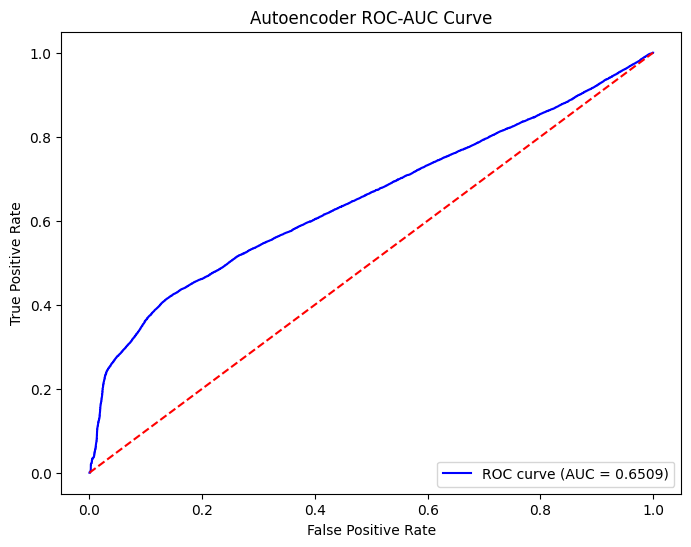

In [56]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mse)  # Use MSE as anomaly score
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Autoencoder ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

In [57]:
# Results of above models ( Calculated using ROC_AUC Score)
results = {
    "Random Forest": roc_auc_score(y_test, y_pred_rf),
    "XGBoost": roc_auc_score(y_test, y_pred_xgb),
    "Isolation Forest": roc_auc_score(y_test, y_pred_iso),
    "LSTM": roc_auc_score(y_test, y_pred_lstm),
    "Autoencoder": roc_auc_score(y_test, y_pred_autoencoder)
}

for model, score in results.items():
    print(f"{model}: ROC-AUC = {score:.4f}")


Random Forest: ROC-AUC = 0.9854
XGBoost: ROC-AUC = 0.9889
Isolation Forest: ROC-AUC = 0.5090
LSTM: ROC-AUC = 0.9926
Autoencoder: ROC-AUC = 0.5367


#### Observations:
1. Random Forest, LSTM, XGBoost provide better result when considering the ROC-AUC score as the evaluation metric for credit card fraud detection.
2. Isolation Forest and Autoencoder perform better accuracy when the number of anomalies is significantly lower compared to valid transactions.
3. However, since the dataset used in this study is fairly balanced, the accuracy of Isolation Forest and Autoencoders is relatively low.
4. Comparing the ROC-AUC scores of different models, LSTM is 99.26% accurate, outperforming Random Forest which is **98.54%** and XGBoost at **98.89%** .
5. The accuracy can be further improved by increasing the sample size or using more advanced deep learning algorithms, though this comes at a higher computational cost. Additionally, implementing complex anomaly detection models could enhance fraud detection accuracy.